# Preparación de los conjuntos de validación y entrenamiento/test

In [1]:
import pandas as pd
import random

Cargamos el pickle con el dataset preprocesado.

In [2]:
df_INbreast = pd.read_pickle('./df_INbreast.pkl')

Escogemos una fracción del 20% para cada una de las categorías para crear el conjunto de validación.

In [3]:
random_seed = 2021
frac_val = .2
casos_total = df_INbreast[['Bi-Rads']]
casos_val = casos_total[casos_total['Bi-Rads'] == 'benigno'].sample(frac = frac_val, random_state = random_seed)
casos_val = casos_val.append(casos_total[casos_total['Bi-Rads'] == 'control'].sample(frac = frac_val, random_state = random_seed))
casos_val = casos_val.append(casos_total[casos_total['Bi-Rads'] == 'maligno'].sample(frac = frac_val, random_state = random_seed))

Dividimos el dataset original en conjunto de validación y de entrenamiento/test. Hacemos también la división de los conjuntos resultantes según su vista para facilitar el entrenamiento por separado de las dos ramas.

In [4]:
df_INbreast_val = df_INbreast[df_INbreast.index.isin(casos_val.index)]
df_INbreast = df_INbreast[~df_INbreast.index.isin(casos_val.index)]

Mostramos por pantalla la cantidad de casos por cada categoría de la muestra que formará el conjunto de entrenamiento/test y el de validación.

<AxesSubplot:>

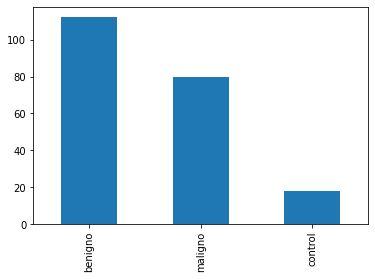

In [5]:
df_INbreast['Bi-Rads'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

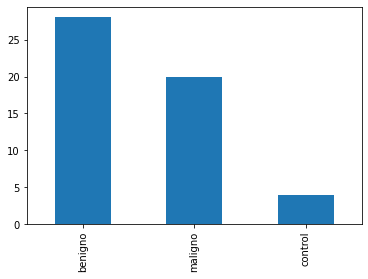

In [6]:
df_INbreast_val['Bi-Rads'].value_counts().plot(kind = 'bar')

Almacenamos los dataset resultantes en ficheros pickle.

In [7]:
df_INbreast_val.to_pickle('./df_INbreast_val.pkl')
df_INbreast.to_pickle('./df_INbreast_train.pkl')